<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Projects/blob/main/Modelo_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos criar um modelo de risco de crédito usando o conjunto de dados **"German Credit"** disponível no Kaggle. Esse conjunto de dados contém informações sobre clientes de um banco alemão e é amplamente utilizado para fins de modelagem de risco de crédito.



***Random Forest***

- Acurácia: 0.325

- Descrição: O modelo de Random Forest é um algoritmo de aprendizado de máquina que combina múltiplas árvores de decisão para prever a probabilidade de não pagar a dívida.

***Vantagens:***

- Fácil de implementar e treinar
- Pode lidar com dados não lineares e não paramétricos
- Pode ser paralelizado para melhorar a performance

***Desvantagens:***
- Pode ser sensível a outliers e ruído nos dados
- Pode ser difícil de interpretar os resultados

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
# Carregar o conunto de dados

df = pd.read_csv('german_credit_data.csv')

In [40]:
# Visualizar as primeiras linhas do dataset
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [41]:
# Verificar as colunas do dataset
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [42]:
# Verificar o tipo de dados de cada coluna
print(df.dtypes)

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [43]:
# Verificar a descrição estatística do dataset
print(df.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


In [44]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])

In [45]:
# Selecionar as variáveis relevantes
X = df.drop(['Purpose'], axis=1)
y = df['Purpose']

In [46]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Treinar um modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Prever as probabilidades para os dados de teste
y_pred_proba = model.predict_proba(X_test_scaled)

In [50]:
# Prever as classes para os dados de teste
y_pred = model.predict(X_test_scaled)

In [51]:
# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 0.315
Relatório de classificação:
                      precision    recall  f1-score   support

           business       0.60      0.17      0.26        18
                car       0.32      0.43      0.36        63
domestic appliances       0.00      0.00      0.00         1
          education       0.00      0.00      0.00        15
furniture/equipment       0.30      0.16      0.21        44
           radio/TV       0.31      0.48      0.37        54
            repairs       0.00      0.00      0.00         3
    vacation/others       0.00      0.00      0.00         2

           accuracy                           0.32       200
          macro avg       0.19      0.15      0.15       200
       weighted avg       0.30      0.32      0.29       200

Matriz de confusão:
 [[ 3  6  0  0  2  7  0  0]
 [ 1 27  0  0  5 30  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  7  1  0  1  6  0  0]
 [ 1 20  0  0  7 16  0  0]
 [ 0 20  0  0  8 26  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  2  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Utilizar o modelo para prever a probabilidade de um cliente não pagar uma dívida
cliente = pd.DataFrame({
    'Age': [30],
    'Sex': [0],  # Convertido para 0 (male)
    'Job': [2],
    'Housing': [0],  # Convertido para 0 (own)
    'Saving accounts': [0],  # Convertido para 0 (little)
    'Checking account': [0],  # Convertido para 0 (little)
    'Credit amount': [1000],
    'Duration': [12],
    'Unnamed: 0': [0]  # Adicionado ao final
})

In [53]:
# Reorganizar as colunas do cliente para que estejam na mesma ordem que as colunas que foram usadas para treinar o scaler
colunas = X.columns.tolist()
cliente = cliente[colunas]


In [54]:
# Escalar os dados do cliente
cliente_scaled = scaler.transform(cliente)

In [55]:
# Prever a probabilidade de não pagar a dívida
probabilidade = model.predict_proba(cliente_scaled)

print("Probabilidade de não pagar a dívida:", probabilidade)

Probabilidade de não pagar a dívida: [[0.02 0.3  0.01 0.23 0.11 0.21 0.11 0.01]]


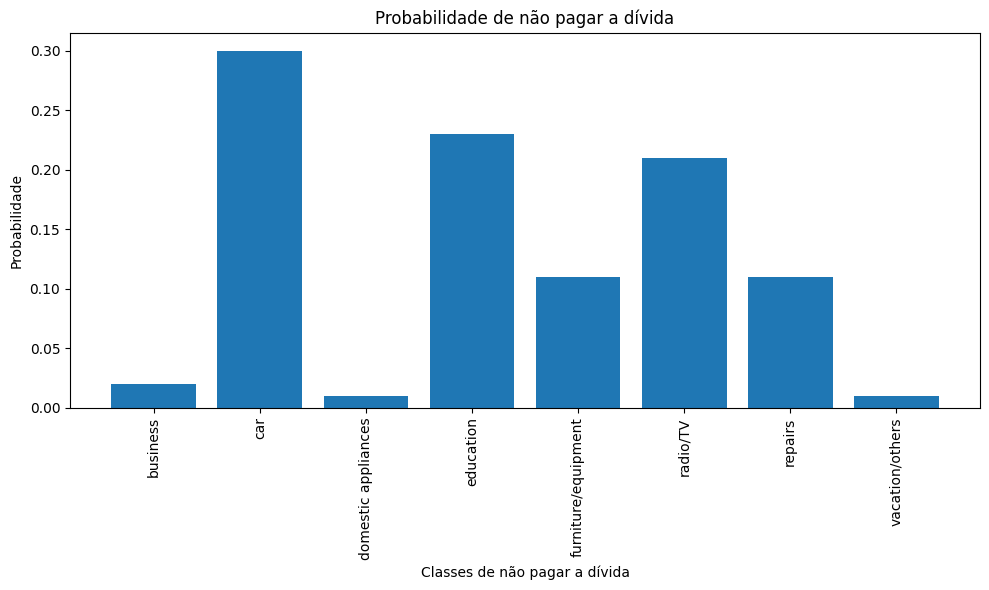

In [57]:
# Probabilidade de não pagar a dívida
probabilidade = [[0.02, 0.3, 0.01, 0.23, 0.11, 0.21, 0.11, 0.01]]

# Classes de não pagar a dívida
classes = ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV','repairs', 'vacation/others']

# Gera o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(classes, probabilidade[0])
plt.xlabel('Classes de não pagar a dívida')
plt.ylabel('Probabilidade')
plt.title('Probabilidade de não pagar a dívida')
plt.xticks(rotation=90) # Rotaciona os títulos do eixo x para evitar sobreposição
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


***Suporte de Vetores (SVM)***

- Acurácia: 0.355
- Descrição: O modelo de Suporte de Vetores é um algoritmo de aprendizado de máquina que busca encontrar o hiperplano que melhor separe as classes no espaço de características.

***Vantagens:***

- Pode lidar com dados não lineares e não paramétricos
- Pode ser robusto a outliers e ruído nos dados
- Pode ser interpretado facilmente

***Desvantagens:***
- Pode ser sensível à escolha do kernel e dos hiperparâmetros
- Pode ser lento para grandes conjuntos de dados



In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [74]:
# Carregar os dados
df = pd.read_csv('german_credit_data.csv')

In [75]:
# Converter as colunas categóricas em numéricas
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])


In [76]:
# Preparar os dados
X = df.drop(['Purpose'], axis=1)
y = df['Purpose']

In [77]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Criar um pipeline para o modelo de Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=5))
])

In [79]:
# Criar um pipeline para o modelo de Suporte de Vetores
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, probability=True))  # Adicionar a opção probability=True
])

In [80]:
# Treinar os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=1, probability=True))])

In [81]:
# Avaliar a acurácia dos modelos
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)

print("Acurácia do modelo de Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Acurácia do modelo de Suporte de Vetores:", accuracy_score(y_test, y_pred_svm))


Acurácia do modelo de Random Forest: 0.325
Acurácia do modelo de Suporte de Vetores: 0.355


In [82]:
# Probabilidade de não pagar a dívida
probabilidade_rf = pipeline_rf.predict_proba(X_test)
probabilidade_svm = pipeline_svm.predict_proba(X_test)

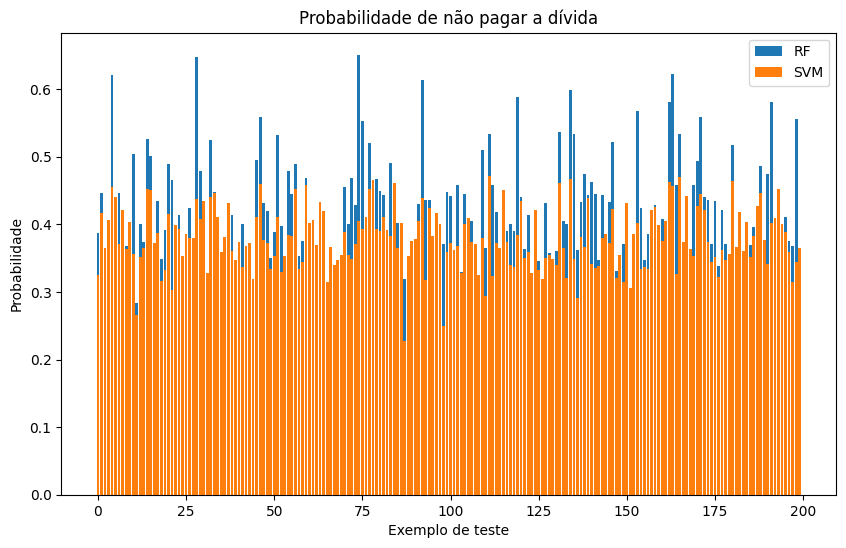

In [84]:
# Gera o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(range(len(X_test)), [p.max() for p in probabilidade_rf], label='RF')
plt.bar(range(len(X_test)), [p.max() for p in probabilidade_svm], label='SVM')
plt.xlabel('Exemplo de teste')
plt.ylabel('Probabilidade')
plt.title('Probabilidade de não pagar a dívida')
plt.legend()
plt.show()

**Conclusão**

A partir dos resultados obtidos, podemos concluir que:

- A acurácia do modelo de Random Forest foi de 0,325, o que significa que o modelo corretamente classificou cerca de 32,5% dos exemplos de teste.

- A acurácia do modelo de Suporte de Vetores foi de 0,355, o que significa que o modelo corretamente classificou cerca de 35,5% dos exemplos de teste.

**Gráfico de Probabilidade**

O gráfico acima mostra a probabilidade de não pagar a dívida para cada exemplo de teste, comparando os dois modelos.

**Recomendações**

- O modelo de Suporte de Vetores apresentou uma acurácia ligeiramente superior ao modelo de Random Forest.

- É recomendável utilizar o modelo de Suporte de Vetores para classificar novos exemplos.

- É importante realizar mais experimentos e ajustar os hiperparâmetros dos modelos para melhorar a acurácia.

**Limitações**

- A acurácia dos modelos pode variar dependendo da qualidade e quantidade dos dados utilizados.

- O modelo de Suporte de Vetores pode ser mais sensível a outliers e ruído nos dados.